>다변수 데이터의 선형회귀를 위한 데이터 확인 및 모델 설계

In [1]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


문자열 데이터가 있기 때문에 pandas의 `get_dummies()` 함수로 문자열 데이터를 0, 1로 변환한다.  
>수식을 구할 때 카테고리형 데이터가 있다면 더미 변수를 활용해 식에 포함시킬 수 있다.  
이러한 데이터 변환 방식을 원-핫 인코딩이라고 한다.

In [3]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [4]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


선형 방정식 : 다변수 일차방정식, 각각의 x에 개별 가중치를 곱한다.  
선형 방정식을 활용해 원하는 값을 예측하는 모델을 설계하고 학습시키는 것을 선형 회귀라고 한다.  
회귀는 연속된 실수갑을 예측하는 문제를 뜻한다.

>다변수 데이터의 선형 회귀를 위한 손실함수 정의

In [5]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

# train 데이터 test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [6]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [8]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean() # 두 갑의 차이의 제곱의 평균
    return mse

In [9]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

>MSE Loss에 대해 그래디언트 수식을 구하고 함수 구현

In [10]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y) # gradient
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [11]:
dW, db = gradient(X, W, b, y)
print('dW: ', dW)
print('db: ', db)

dW:  [15671.89286631  1895.68781349   450.05618753   222.71977409
   266.18725756   406.58870406   153.54198047    46.38108796
   244.39735855   228.45553465   164.69424341   508.08171821]
db:  33.08734237487518


>손실함수, 기울기 함수로 경사하강법으로 모델 학습

In [12]:
LEARNING_RATE = 0.0001

In [13]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : loss %0.4f' % (i, L))

Iteration 10 : loss 1.8223
Iteration 20 : loss 1.7699
Iteration 30 : loss 1.7336
Iteration 40 : loss 1.6996
Iteration 50 : loss 1.6677
Iteration 60 : loss 1.6379
Iteration 70 : loss 1.6098
Iteration 80 : loss 1.5836
Iteration 90 : loss 1.5589
Iteration 100 : loss 1.5358
Iteration 110 : loss 1.5140
Iteration 120 : loss 1.4936
Iteration 130 : loss 1.4745
Iteration 140 : loss 1.4565
Iteration 150 : loss 1.4396
Iteration 160 : loss 1.4237
Iteration 170 : loss 1.4088
Iteration 180 : loss 1.3947
Iteration 190 : loss 1.3815
Iteration 200 : loss 1.3690
Iteration 210 : loss 1.3573
Iteration 220 : loss 1.3463
Iteration 230 : loss 1.3359
Iteration 240 : loss 1.3261
Iteration 250 : loss 1.3168
Iteration 260 : loss 1.3081
Iteration 270 : loss 1.2999
Iteration 280 : loss 1.2921
Iteration 290 : loss 1.2848
Iteration 300 : loss 1.2778
Iteration 310 : loss 1.2713
Iteration 320 : loss 1.2651
Iteration 330 : loss 1.2592
Iteration 340 : loss 1.2536
Iteration 350 : loss 1.2484
Iteration 360 : loss 1.2434
I

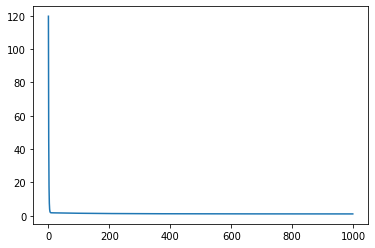

In [14]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [15]:
W, b

(array([ 0.08583282,  0.14139861,  0.22784727,  0.27740432, -0.10745244,
        -0.03836569, -0.03169494,  0.50765102,  0.25058182,  0.52906558,
         0.64557872,  0.29354899]),
 0.18075802002831148)

In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.6513446818893718

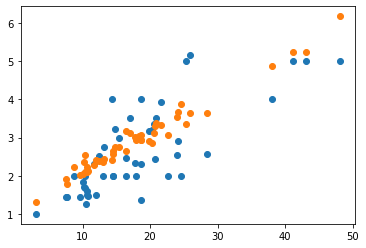

In [17]:
# prediction과 y_test 비교
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()